<a href="https://colab.research.google.com/github/danielimorgan/Zoo_Data_Project/blob/main/project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Animal Classification ML Project

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
#Needed for report visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [178]:
# Load the animal class data

class_data = pd.read_csv('/content/drive/MyDrive/class.csv')
class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [179]:
# Load the zoo data

zoo_data = pd.read_csv('/content/drive/MyDrive/zoo.csv')
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [180]:
additional_df = pd.read_csv('/content/drive/MyDrive/merged_extended_data.csv')
additional_df.head()

,animal_name,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,aardwolf,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
2,african_elephant,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
3,alligator,Reptile,3,True,False,True,False,False,True,True,True,True,True,False,False,True,True,4
4,alpaca,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4


# Zoo Data Cleaning

In [181]:
# Find duplicates in the dataset.
duplicates = zoo_data[zoo_data.duplicated(subset='animal_name')]
print(duplicates)

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
26        1         1         1         1     0     4     0         0   

    catsize  class_type  
26        0           5  


In [182]:
# Drop duplicates
zoo_data.drop_duplicates(subset='animal_name', inplace=True)



In [183]:
# Rename the animal_name "girl" to "human".
zoo_data.loc[zoo_data['animal_name'] == 'girl', 'animal_name'] = 'human'


In [184]:
# Check the datatypes of the dataset.
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    int64 
 2   feathers     100 non-null    int64 
 3   eggs         100 non-null    int64 
 4   milk         100 non-null    int64 
 5   airborne     100 non-null    int64 
 6   aquatic      100 non-null    int64 
 7   predator     100 non-null    int64 
 8   toothed      100 non-null    int64 
 9   backbone     100 non-null    int64 
 10  breathes     100 non-null    int64 
 11  venomous     100 non-null    int64 
 12  fins         100 non-null    int64 
 13  legs         100 non-null    int64 
 14  tail         100 non-null    int64 
 15  domestic     100 non-null    int64 
 16  catsize      100 non-null    int64 
 17  class_type   100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.8+ KB


In [185]:
# Change the datatype of the boolean columns to bool.
boolean_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']
zoo_data[boolean_columns] = zoo_data[boolean_columns].astype(bool)

In [186]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    bool  
 2   feathers     100 non-null    bool  
 3   eggs         100 non-null    bool  
 4   milk         100 non-null    bool  
 5   airborne     100 non-null    bool  
 6   aquatic      100 non-null    bool  
 7   predator     100 non-null    bool  
 8   toothed      100 non-null    bool  
 9   backbone     100 non-null    bool  
 10  breathes     100 non-null    bool  
 11  venomous     100 non-null    bool  
 12  fins         100 non-null    bool  
 13  legs         100 non-null    int64 
 14  tail         100 non-null    bool  
 15  domestic     100 non-null    bool  
 16  catsize      100 non-null    bool  
 17  class_type   100 non-null    int64 
dtypes: bool(15), int64(2), object(1)
memory usage: 4.6+ KB


In [187]:
# Reset the index of the DataFrame.
zoo_data = zoo_data.reset_index(drop=True)
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1


In [188]:
# Drop the columns "catsize" and "domestic" from the dataset.
zoo_data.drop(['catsize', 'domestic'], axis=1, inplace=True)

# Rename the column "breathes" to "air_breather".
zoo_data.rename(columns={'breathes': 'air_breather'}, inplace=True)
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1


In [189]:
# Create a new column called "water_breather" and set it to True if the animal breathes water.
zoo_data['water_breather'] = np.where(zoo_data['class_type'].isin([4, 5]), True, False)
zoo_data.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type,water_breather
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1,False
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4,True
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1,False


In [190]:
# Create a new column order
reorder_columns = ['animal_name', 'class_type', 'hair', 'feathers', 'eggs'
                   , 'milk', 'airborne', 'aquatic', 'predator', 'toothed'
                    , 'backbone', 'air_breather', 'water_breather', 'venomous'
                    , 'fins', 'tail', 'legs']

# Reorder the columns
zoo_data = zoo_data.reindex(columns=reorder_columns)

# Print the updated DataFrame
zoo_data.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


# Zoo/Class Data Merge

In [191]:
# Rename columns to match zoo_data
class_data = class_data.rename(columns={'Class_Type': 'Class_Name', 'Class_Number': 'class_type'})
class_data.head()

,class_type,Number_Of_Animal_Species_In_Class,Class_Name,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [192]:
# Merge the two DataFrames.
merged_df = pd.merge(zoo_data, class_data, how='left', on=["class_type", "class_type"])
merged_df.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs,Number_Of_Animal_Species_In_Class,Class_Name,Animal_Names
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [193]:
# Drop the extra columns
columns_to_drop = ['Number_Of_Animal_Species_In_Class', 'Animal_Names']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs,Class_Name
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,Mammal
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4,Mammal
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0,Fish
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4,Mammal
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4,Mammal


In [194]:
# Reorder columns
new_columns = ['animal_name', 'Class_Name','class_type', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'air_breather', 'water_breather', 'venomous', 'fins', 'tail', 'legs']
merged_df = merged_df.reindex(columns=new_columns)
merged_df.head()


,animal_name,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,Fish,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [195]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     100 non-null    object
 1   Class_Name      100 non-null    object
 2   class_type      100 non-null    int64 
 3   hair            100 non-null    bool  
 4   feathers        100 non-null    bool  
 5   eggs            100 non-null    bool  
 6   milk            100 non-null    bool  
 7   airborne        100 non-null    bool  
 8   aquatic         100 non-null    bool  
 9   predator        100 non-null    bool  
 10  toothed         100 non-null    bool  
 11  backbone        100 non-null    bool  
 12  air_breather    100 non-null    bool  
 13  water_breather  100 non-null    bool  
 14  venomous        100 non-null    bool  
 15  fins            100 non-null    bool  
 16  tail            100 non-null    bool  
 17  legs            100 non-null    int64 
dtypes: bool(14)

## Add a third csv file `corrected_animal` to the merged dataset

In [196]:
# Read the CSV file containing additional rows into a new DataFrame
additional_df = pd.read_csv('/content/drive/MyDrive/merged_extended_data.csv',sep=',')
print(additional_df.shape)
additional_df.info()

(276, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     276 non-null    object
 1   Class_Name      276 non-null    object
 2   class_type      276 non-null    int64 
 3   hair            276 non-null    bool  
 4   feathers        276 non-null    bool  
 5   eggs            276 non-null    bool  
 6   milk            276 non-null    bool  
 7   airborne        276 non-null    bool  
 8   aquatic         276 non-null    bool  
 9   predator        276 non-null    bool  
 10  toothed         276 non-null    bool  
 11  backbone        276 non-null    bool  
 12  air_breather    276 non-null    bool  
 13  water_breather  276 non-null    bool  
 14  venomous        276 non-null    bool  
 15  fins            276 non-null    bool  
 16  tail            276 non-null    bool  
 17  legs            276 non-null    int64 
dtype

In [197]:
# Concatenate the original DataFrame with the new DataFrame containing additional rows
merged_data = pd.concat([merged_df, additional_df], ignore_index=True)
print(merged_data.shape)
# Reset the index of the concatenated DataFrame
merged_data.reset_index(drop=True, inplace=True)

# Print the concatenated DataFrame
merged_data.head()

(376, 18)


,animal_name,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,Fish,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [198]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     376 non-null    object
 1   Class_Name      376 non-null    object
 2   class_type      376 non-null    int64 
 3   hair            376 non-null    bool  
 4   feathers        376 non-null    bool  
 5   eggs            376 non-null    bool  
 6   milk            376 non-null    bool  
 7   airborne        376 non-null    bool  
 8   aquatic         376 non-null    bool  
 9   predator        376 non-null    bool  
 10  toothed         376 non-null    bool  
 11  backbone        376 non-null    bool  
 12  air_breather    376 non-null    bool  
 13  water_breather  376 non-null    bool  
 14  venomous        376 non-null    bool  
 15  fins            376 non-null    bool  
 16  tail            376 non-null    bool  
 17  legs            376 non-null    int64 
dtypes: bool(14

In [ ]:
# Find duplicates in the dataset.
duplicates_2 = merged_data[merged_data.duplicated(subset='animal_name')]
print(duplicates_2)

In [200]:
# Drop duplicates
merged_data.drop_duplicates(subset='animal_name', inplace=True)

In [201]:
# Reorder the DataFrame by animal_name.
merged_data = merged_data.sort_values(by='animal_name')

# Reset the index of the concatenated DataFrame
merged_data.reset_index(drop=True, inplace=True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animal_name     277 non-null    object
 1   Class_Name      277 non-null    object
 2   class_type      277 non-null    int64 
 3   hair            277 non-null    bool  
 4   feathers        277 non-null    bool  
 5   eggs            277 non-null    bool  
 6   milk            277 non-null    bool  
 7   airborne        277 non-null    bool  
 8   aquatic         277 non-null    bool  
 9   predator        277 non-null    bool  
 10  toothed         277 non-null    bool  
 11  backbone        277 non-null    bool  
 12  air_breather    277 non-null    bool  
 13  water_breather  277 non-null    bool  
 14  venomous        277 non-null    bool  
 15  fins            277 non-null    bool  
 16  tail            277 non-null    bool  
 17  legs            277 non-null    int64 
dtypes: bool(14

In [113]:
# Drop animal_name from merged_data
merged_data = merged_data.drop(columns=['animal_name'])
merged_data.head()

,Class_Name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,Mammal,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
2,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
3,Reptile,3,True,False,True,False,False,True,True,True,True,True,False,False,True,True,4
4,Mammal,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4


In [114]:
class_count = merged_data['Class_Name'].value_counts()
print(class_count)

Mammal          187
Bird             33
Fish             15
Reptile          14
Invertebrate     13
Bug               9
Amphibian         6
Name: Class_Name, dtype: int64


In [115]:
merged_data.shape

(277, 17)

In [116]:
# export the merged_data into a csv file

merged_data.to_csv('/content/drive/MyDrive/final_merged_data.csv')


# Decision Tree Model

In [117]:
# Define features set
X = merged_data.copy()
X.drop(["Class_Name", "class_type"], axis=1, inplace=True)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
2,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
3,True,False,True,False,False,True,True,True,True,True,False,False,True,True,4
4,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4


In [118]:
 # Define target vector
y = merged_data["Class_Name"].values.reshape(-1, 1)
y[:5]


array([['Mammal'],
       ['Mammal'],
       ['Mammal'],
       ['Reptile'],
       ['Mammal']], dtype=object)

In [119]:
#print unique values of y

unique_values = np.unique(y)
print(unique_values)


['Amphibian' 'Bird' 'Bug' 'Fish' 'Invertebrate' 'Mammal' 'Reptile']


In [120]:
# Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [122]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [123]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

In [125]:
#Check the data types of X_train and y_train:
print(f"X_train data type: {type(X_train)}")
print(f"y_train data type: {type(y_train)}")

X_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'numpy.ndarray'>


In [126]:
#convert y_train to a dataframe
y_train = pd.DataFrame(y_train)

In [127]:
#check for missing values
print(f"Number of missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Number of missing values in y_train: {y_train.isnull().sum().sum()}")

Number of missing values in X_train: 0
Number of missing values in y_train: 0


In [128]:
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
# Make predictions on the training set
y_train_pred = dt_model.predict(X_train)

In [130]:
# Evaluate the model on the training set
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
classification_rep = classification_report(y_train, y_train_pred)

In [131]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report for train set:\n{classification_rep}")

Accuracy: 0.9819004524886877
Confusion Matrix:
[[  5   0   0   0   0   0   0]
 [  0  27   0   0   0   1   0]
 [  0   0   9   0   0   0   0]
 [  0   0   0  12   0   0   0]
 [  0   0   0   0   8   0   0]
 [  0   0   0   0   0 146   0]
 [  0   0   0   0   0   3  10]]
Classification Report for train set:
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         5
        Bird       1.00      0.96      0.98        28
         Bug       1.00      1.00      1.00         9
        Fish       1.00      1.00      1.00        12
Invertebrate       1.00      1.00      1.00         8
      Mammal       0.97      1.00      0.99       146
     Reptile       1.00      0.77      0.87        13

    accuracy                           0.98       221
   macro avg       1.00      0.96      0.98       221
weighted avg       0.98      0.98      0.98       221



In [132]:
# Make predictions on the test set
prediction = dt_model.predict(X_test)

In [133]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, prediction)
test_conf_matrix = confusion_matrix(y_test, prediction)
test_classification_rep = classification_report(y_test, prediction)

In [134]:

print("\nTest Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report for Test Set:\n{test_classification_rep}")


Test Set Results:
Accuracy: 1.0
Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0  1]]
Classification Report for Test Set:
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         5
        Fish       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         5
      Mammal       1.00      1.00      1.00        41
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [135]:
# Get the feature importance array for the decision tree
importances = dt_model.feature_importances_
# Sort important features by their importance
dt_importances_sorted = sorted(zip(dt_model.feature_importances_, X.columns), reverse=True)[:10]
dt_importances_sorted


[(0.3601718635384921, 'milk'),
 (0.2079571200009086, 'feathers'),
 (0.09660909757193906, 'water_breather'),
 (0.0961708872889121, 'legs'),
 (0.08657465892110666, 'fins'),
 (0.05764323339526883, 'hair'),
 (0.056592417075152106, 'predator'),
 (0.016123678343909056, 'airborne'),
 (0.015527151205430696, 'tail'),
 (0.006629892658880761, 'aquatic')]

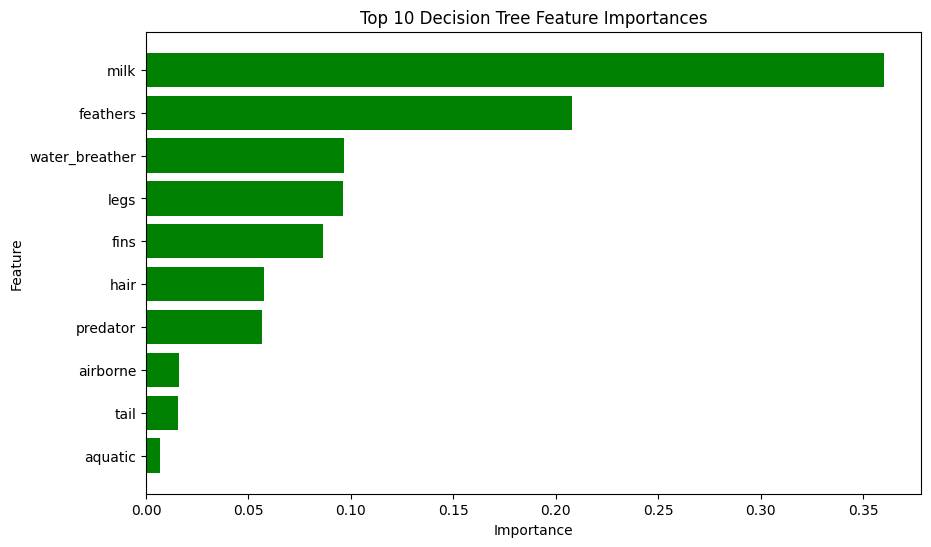

In [136]:
# Create a graph for the top 10 Decision Tree feature importances

plt.figure(figsize=(10, 6))

# Sort the dt_importances_sorted list in descending order
dt_importances_sorted = sorted(dt_importances_sorted, reverse=False)

# Extract feature names and their importances
features = [x[1] for x in dt_importances_sorted]
importances = [x[0] for x in dt_importances_sorted]

# Plot the horizontal bar graph
plt.barh(features, importances, color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Decision Tree Feature Importances')
plt.show()


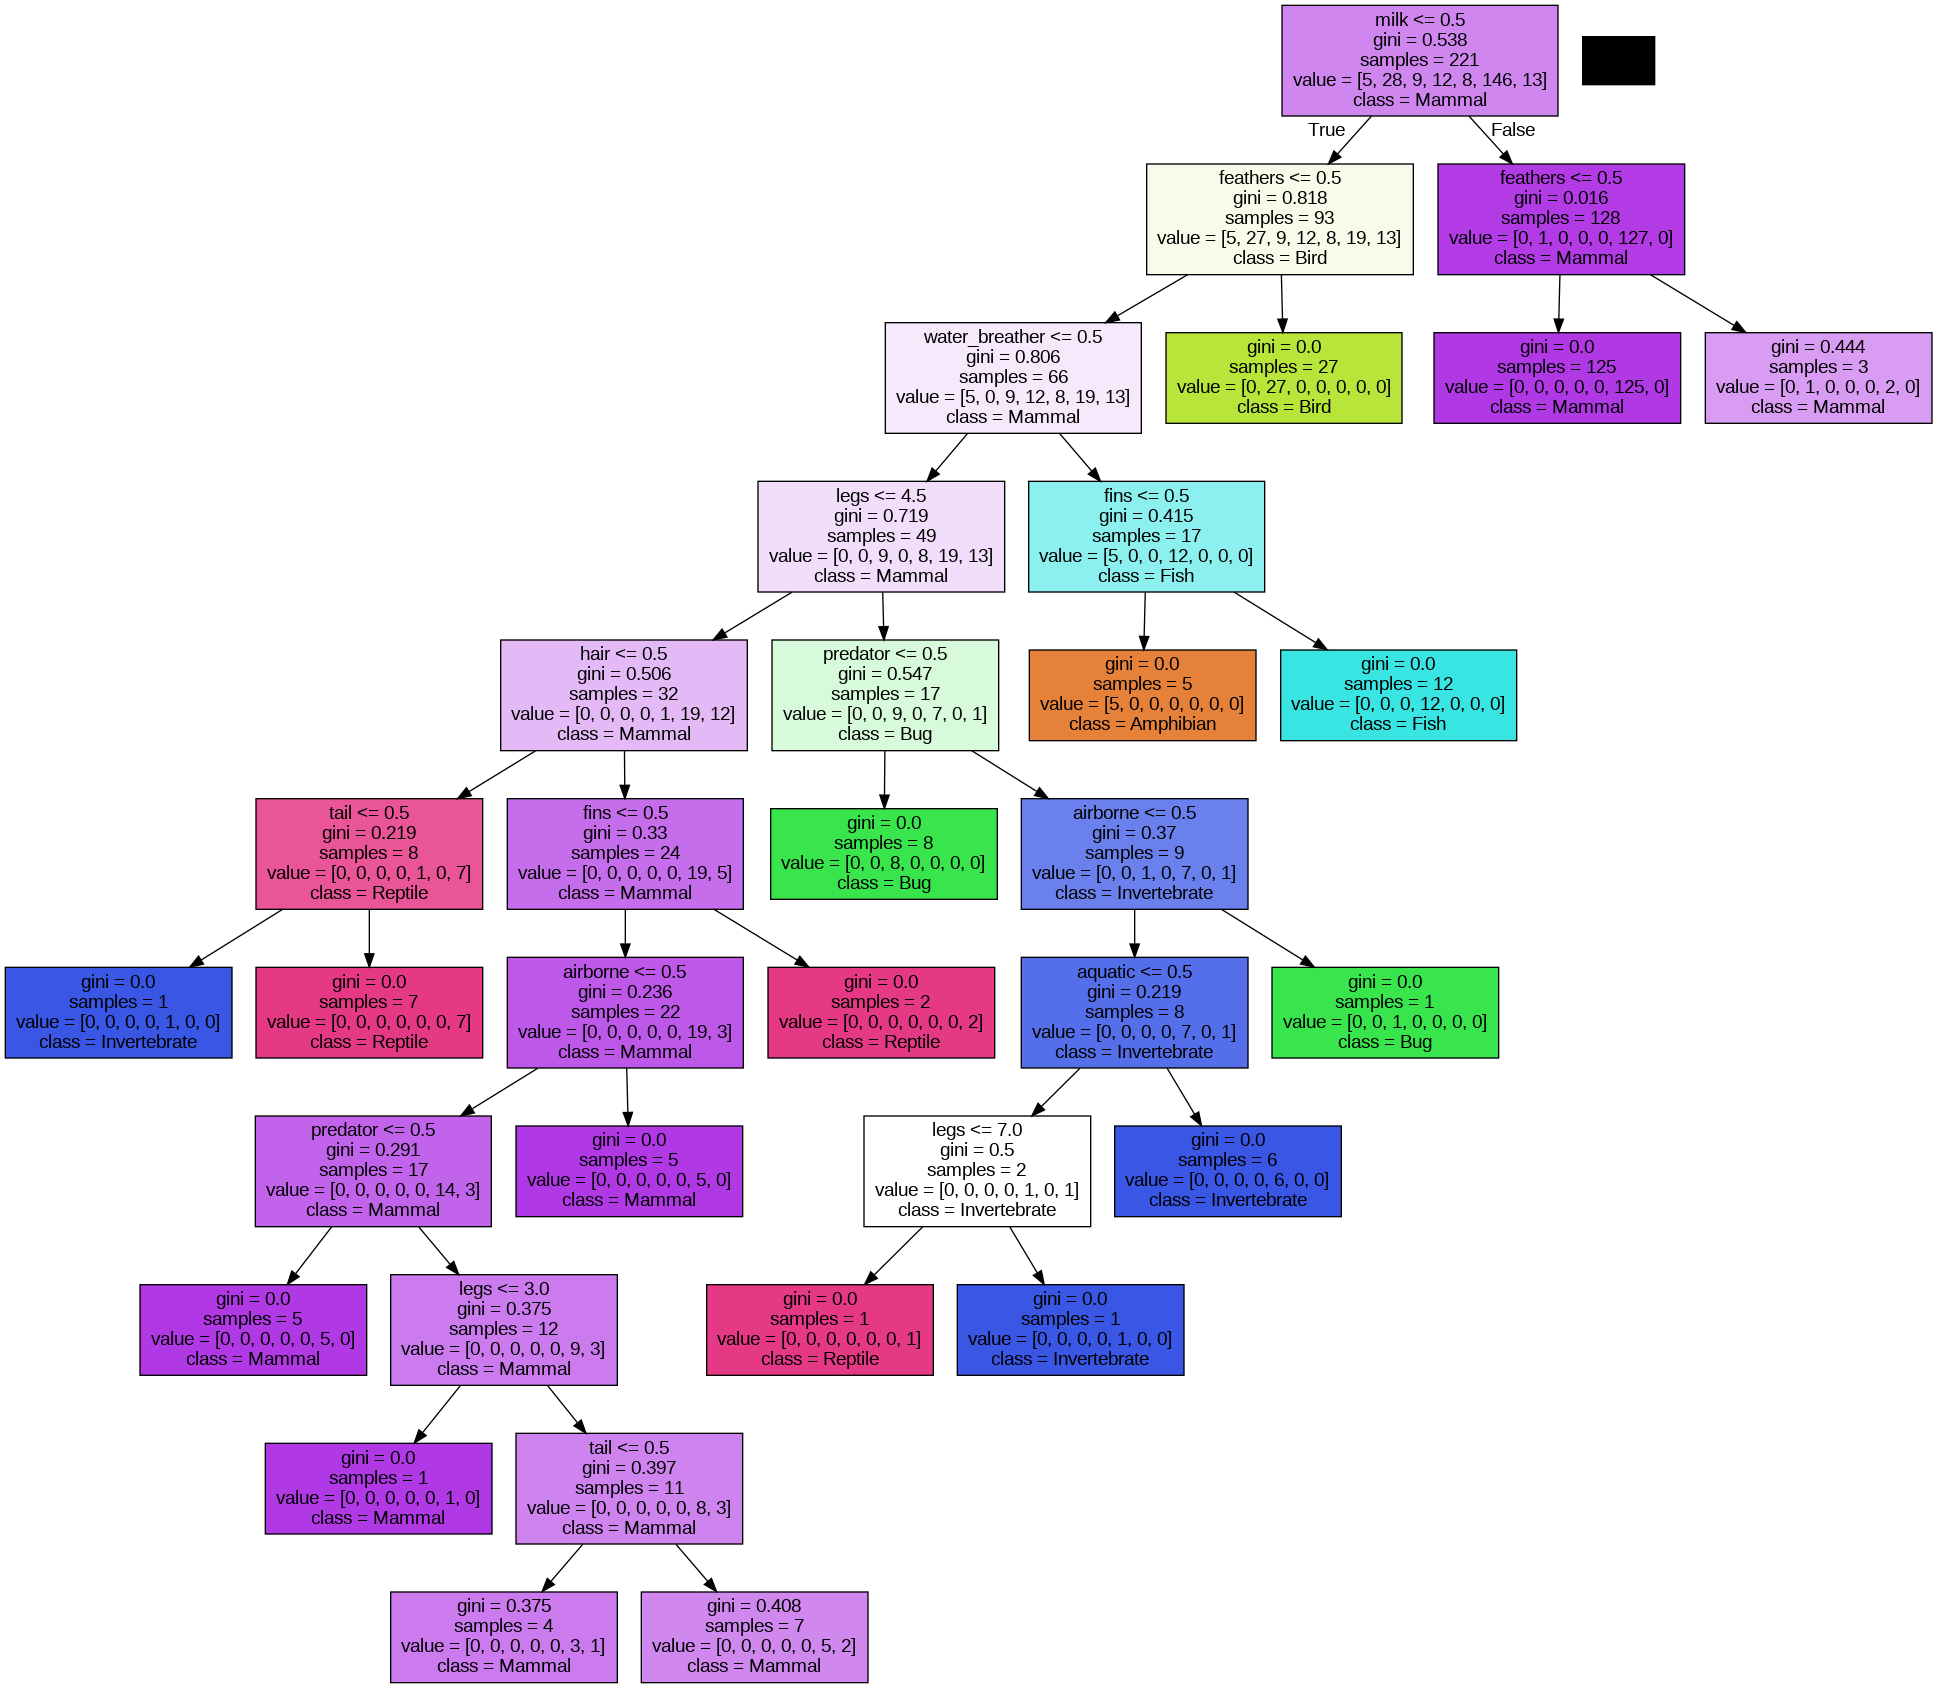

In [137]:
# Create DOT data

dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=dt_model.classes_, filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())




In [138]:
# Saving the tree as PNG
file_path = "/content/drive/MyDrive/decision_tree.png"
graph.write_png(file_path)

True

In [139]:
#  save dt_model to joblib

!pip install joblib
import joblib
joblib.dump(dt_model, '/content/drive/MyDrive/dt_model.joblib')


['/content/drive/MyDrive/dt_model.joblib']

#SVM Model

In [140]:
# Fit to the training data and validate with the test data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Fish', 'Mammal', 'Bird', 'Fish', 'Reptile', 'Mammal', 'Bird',
       'Reptile', 'Fish', 'Mammal', 'Amphibian', 'Invertebrate', 'Mammal',
       'Bird', 'Reptile', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Reptile', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Reptile', 'Bird', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bird', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal'],
      dtype=object)

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         5
        Fish       1.00      1.00      1.00         3
Invertebrate       1.00      0.20      0.33         5
      Mammal       1.00      1.00      1.00        41
     Reptile       0.20      1.00      0.33         1

    accuracy                           0.93        56
   macro avg       0.87      0.87      0.78        56
weighted avg       0.99      0.93      0.93        56



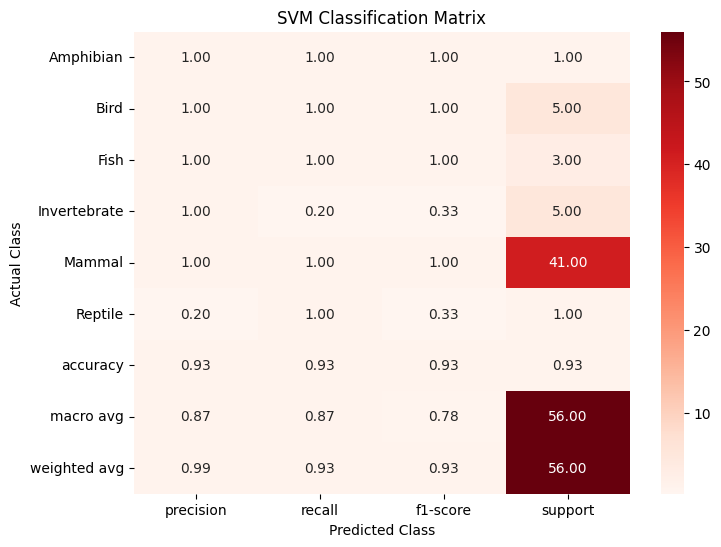

In [142]:

# Create the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Create a DataFrame from the report
report_df = pd.DataFrame(report).transpose()

# Set the class names as the index
report_df.index.name = 'Class'

# Create the classification matrix chart
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Reds", ax=ax)

# Set the title and labels
ax.set_title('SVM Classification Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')

# Display the chart
plt.show()


In [143]:
# Saving the chart as PNG
file_path = "/content/drive/MyDrive/class_chart_svm.png"
plt.savefig(file_path)


<Figure size 640x480 with 0 Axes>

In [144]:
#create a feature importance array for the svm model above

svm_importances = model.coef_.ravel()
svm_importances_sorted = sorted(zip(importances, X.columns), reverse=True)[:10]
svm_importances_sorted



[(0.3601718635384921, 'air_breather'),
 (0.2079571200009086, 'backbone'),
 (0.09660909757193906, 'toothed'),
 (0.0961708872889121, 'predator'),
 (0.08657465892110666, 'aquatic'),
 (0.05764323339526883, 'airborne'),
 (0.056592417075152106, 'milk'),
 (0.016123678343909056, 'eggs'),
 (0.015527151205430696, 'feathers'),
 (0.006629892658880761, 'hair')]

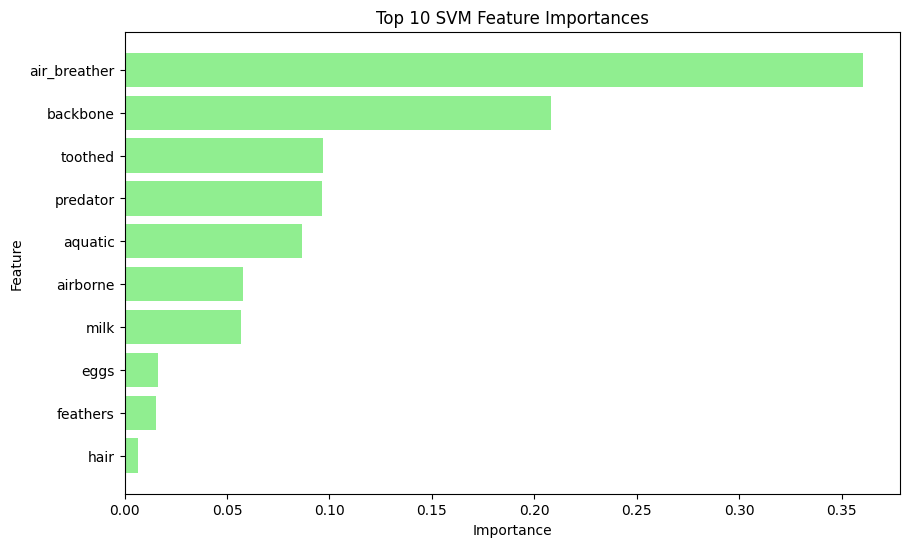

In [145]:

# Create a graph for the top 10 SVM feature importances

plt.figure(figsize=(10, 6))

# Sort the svm_importances_sorted list in descending order
svm_importances_sorted = sorted(svm_importances_sorted, reverse=False)

# Extract feature names and their importances
features = [x[1] for x in svm_importances_sorted]
importances = [x[0] for x in svm_importances_sorted]

# Plot the horizontal bar graph
plt.barh(features, importances, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 SVM Feature Importances')
plt.show()


In [146]:
#  save dt_model to joblib

joblib.dump(model, '/content/drive/MyDrive/svm_model.joblib')

['/content/drive/MyDrive/svm_model.joblib']

# PyCaret

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret

In [ ]:
!pip install mlflow

In [63]:
updated_merged_data = merged_data.drop(columns="class_type",  axis=1)
updated_merged_data.shape

(277, 16)

In [74]:
from pycaret.classification import *

s = setup(updated_merged_data, train_size=0.8, target="Class_Name")


,Description,Value
0,Session id,3652
1,Target,Class_Name
2,Target type,Multiclass
3,Target mapping,"Amphibian: 0, Bird: 1, Bug: 2, Fish: 3, Invertebrate: 4, Mammal: 5, Reptile: 6"
4,Original data shape,"(277, 16)"
5,Transformed data shape,"(277, 16)"
6,Transformed train set shape,"(221, 16)"
7,Transformed test set shape,"(56, 16)"
8,Numeric features,1
9,Preprocess,True


In [75]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9591,0.0000,0.9591,0.9605,0.9583,0.9250,0.9282,0.6550
knn,K Neighbors Classifier,0.9502,0.0000,0.9502,0.9319,0.9371,0.8986,0.9045,0.0960
rf,Random Forest Classifier,0.9500,0.0000,0.9500,0.9494,0.9473,0.9059,0.9104,0.5170
lightgbm,Light Gradient Boosting Machine,0.9500,0.0000,0.9500,0.9537,0.9487,0.9074,0.9115,0.4320
lr,Logistic Regression,0.9455,0.0000,0.9455,0.9144,0.9273,0.8878,0.8945,1.1870
xgboost,Extreme Gradient Boosting,0.9455,0.0000,0.9455,0.9426,0.9412,0.8978,0.9023,0.1720
et,Extra Trees Classifier,0.9364,0.0000,0.9364,0.9358,0.9326,0.8808,0.8863,0.2160
nb,Naive Bayes,0.9318,0.0000,0.9318,0.9524,0.9357,0.8788,0.8870,0.0630
lda,Linear Discriminant Analysis,0.9275,0.0000,0.9275,0.9015,0.9109,0.8539,0.8604,0.0380
dt,Decision Tree Classifier,0.9273,0.0000,0.9273,0.9247,0.9209,0.8633,0.8700,0.0890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [76]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3652, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [77]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['legs'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=3652, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [78]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(best)

In [80]:
dt = create_model("dt", fold = 5) #decision tree

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9556,0.0000,0.9556,0.9667,0.9580,0.9167,0.9175
1,0.9545,0.0000,0.9545,0.9666,0.9509,0.9090,0.9113
2,0.9318,0.0000,0.9318,0.9280,0.9221,0.8703,0.8731
3,0.9545,0.0000,0.9545,0.9426,0.9461,0.9128,0.9148
4,0.8409,0.0000,0.8409,0.8587,0.8438,0.7187,0.7265
Mean,0.9275,0.0000,0.9275,0.9325,0.9242,0.8655,0.8686
Std,0.0442,0.0000,0.0442,0.0398,0.0420,0.0753,0.0729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [81]:
svm = create_model("svm", fold = 5) #SVM

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.0000,0.9333,0.9417,0.9285,0.8680,0.8728
1,0.9318,0.0000,0.9318,0.9422,0.9235,0.8593,0.8647
2,0.9545,0.0000,0.9545,0.9629,0.9494,0.9089,0.9112
3,0.9545,0.0000,0.9545,0.9318,0.9394,0.9108,0.9145
4,0.9091,0.0000,0.9091,0.9280,0.8999,0.8280,0.8349
Mean,0.9367,0.0000,0.9367,0.9413,0.9281,0.8750,0.8796
Std,0.0169,0.0000,0.0169,0.0121,0.0167,0.0314,0.0299


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
rf = create_model("rf", fold = 5) #random forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.0000,0.9744,0.9753,0.9732,0.9503,0.9519
1,0.9487,0.0000,0.9487,0.9316,0.9385,0.9031,0.9042
2,0.9744,0.0000,0.9744,0.9753,0.9703,0.9501,0.9518
3,0.9211,0.0000,0.9211,0.9045,0.9038,0.8408,0.8473
4,0.9737,0.0000,0.9737,0.9825,0.9719,0.9482,0.9495
Mean,0.9584,0.0000,0.9584,0.9538,0.9515,0.9185,0.9210
Std,0.0211,0.0000,0.0211,0.0306,0.0272,0.0428,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
gbc = create_model("gbc", fold = 5) #Gradient Boosting Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.0000,0.9744,0.9786,0.9753,0.9528,0.9543
1,0.9487,0.0000,0.9487,0.9487,0.9402,0.9031,0.9065
2,0.9487,0.0000,0.9487,0.9524,0.9411,0.8971,0.9027
3,0.9737,0.0000,0.9737,0.9747,0.9695,0.9468,0.9487
4,0.9211,0.0000,0.9211,0.9684,0.9325,0.8542,0.8631
Mean,0.9533,0.0000,0.9533,0.9646,0.9517,0.9108,0.9151
Std,0.0197,0.0000,0.0197,0.0120,0.0172,0.0361,0.0334


Processing:   0%|          | 0/4 [00:00<?, ?it/s]